In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import clear_output # 결과창 Clear 용
 

In [3]:
!pip install mlflow

# 결과창 Clear하기
for i in range(10):
    clear_output(wait=True)
    print("Done", flush=True)

Done


## 굳이 이 데이터셋으로 하는 이유

- implicit 한 데이터셋
- 음악데이터 셋의 특성 상 휘발성이 높음

## 전처리 단계

### 데이터 불러오기

In [4]:
# Util_1 : Json 형태의 파일 불러오기

def load_train_json(path):
    f = pd.read_json(path ,typ = 'frame', encoding="utf-8")
    df = pd.DataFrame(f)
    df = df.sort_values(by=['like_cnt'],ascending=False)
    df = df[df['like_cnt']>10]
    print('load_train_json')
    return df


def load_val_json(path):
    f = pd.read_json(path ,typ = 'frame', encoding="utf-8")
    df = pd.DataFrame(f)
    df = df.sort_values(by=['like_cnt'],ascending=False)
    print('load_test_json')
    return df

def load_meta_json(path):
    f = pd.read_json(path ,typ = 'frame', encoding="utf-8")
    df = pd.DataFrame(f)
    print('load_meta_json')
    return df

In [5]:
songs_p ='/content/drive/MyDrive/Colab Notebooks/recosys_project/melon_dataset/song_meta.json'
train_p= '/content/drive/MyDrive/Colab Notebooks/recosys_project/melon_dataset/train.json'
test_p ='/content/drive/MyDrive/Colab Notebooks/recosys_project/melon_dataset/test.json'

raw_train = load_train_json(train_p)
raw_test = load_val_json(test_p)
song_meta  = load_meta_json(songs_p)

load_train_json
load_test_json
load_meta_json


In [6]:
raw_train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000
85071,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]",122388,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[532771, 383775, 432753, 176384, 152694, 60126...",41844,2020-04-23 20:58:45.000
102651,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]",26174,듣다보면 '우와!' 하고 제목을 보게되는 팝,"[40160, 20039, 561488, 20051, 16242, 256568, 7...",27268,2020-04-19 21:22:11.000
101464,"[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...",72658,"약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]","[111779, 406878, 417725, 129878, 357770, 34879...",23965,2020-04-22 16:05:39.000
59894,"[힐링, 휴식, 기분전환]",113501,감성이 터지는 팝음악들,"[342524, 1233, 417666, 394523, 107455, 17206, ...",23732,2015-07-29 08:25:35.000


In [158]:
raw_train[raw_train['id']==107]

,tags,id,plylst_title,songs,like_cnt,updt_date
86410,"[감성, 싸이월드BGM, 회상, 추억, 드라이브, bgm, 2000년대, 싸이월드, 밤]",107,"2000년대 그시절, 우리가 좋아했던 노래 (싸이월드 BGM!!!)","[383355, 529965, 70662, 457911, 194890, 222763...",3405,2020-03-03 15:03:51.000


In [7]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [8]:
df = raw_train.copy()
song_meta_df = song_meta.copy()

use_col = ['id','songs','like_cnt']
use_col_song = ['id','song_name','artist_name_basket']

df = df[use_col]
song_meta_df = song_meta[use_col_song]

In [159]:
song_meta_df['songs'] = song_meta_df['id']
song_meta_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,song_name,artist_name_basket,songs
0,0,Feelings,[Various Artists],0
1,1,"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1
2,2,Solsbury Hill (Remastered 2002),[Peter Gabriel],2
3,3,Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3
4,4,그남자 그여자,[Jude Law],4
...,...,...,...,...
707984,707984,Coffin For Head Of State,[Fela Kuti],707984
707985,707985,Change Of Heart,[Cyndi Lauper],707985
707986,707986,스치듯 안녕,[윤종신],707986
707987,707987,숲의 빛,[Nature Piano],707987


In [183]:
song_pl_join = pd.merge(long_df,song_meta_df,how='left',on='songs')

ex_107=song_pl_join[song_pl_join['id_x']==107]
ex_107[['song_name','artist_name_basket']].head(10)

,song_name,artist_name_basket
47902,Closer,[Travis]
47903,벌써 일년,[브라운 아이즈]
47904,너희가 힙합을 아느냐?,[드렁큰 타이거]
47905,신기한 노래,[크라잉넛 (CRYING NUT)]
47906,회상,[허니 패밀리]
47907,I Love You,[포지션]
47908,하루하루,[윤미래]
47909,사랑은 언제나 목마르다,[유미]
47910,일기,[캔디맨]
47911,G火자,[윤미래]


In [171]:
ex_107.song_name.to_list()

['Closer',
 '벌써 일년',
 '너희가 힙합을 아느냐?',
 '신기한 노래',
 '회상',
 'I Love You',
 '하루하루',
 '사랑은 언제나 목마르다',
 '일기',
 'G火자',
 'Memories... (Smiling Tears)',
 '라라라',
 'She`s Got The Part',
 'Remember Me',
 'Kiss The Rain',
 'Moon & Sunrise',
 'Don`t Push Me',
 'High Skool',
 '사랑의 바보',
 '이 놈의 Shake It',
 '하나하면 너와 나',
 '휠릴리',
 'Witches (Doo-Loo-Wap) (Feat. 1TYM 태빈, 이은주)',
 '17171771',
 '유난히 (Feat. 신예원)',
 '아틀란티스 소녀 (Atlantis Princess)',
 '그댄 달라요',
 '위대한 유산',
 '꽃피는 봄이오면',
 '달',
 '너가 날 떠나면 안되는 이유 (Feat. 정표)',
 '사랑인걸',
 '비망록 (스물의노래)',
 'Life Is Cool',
 '리기동 (Feat. Red Roc, Sugar Flow)',
 '즐거운 생활',
 'Past Luv',
 '떠나가요, 떠나지마요',
 'Happy People',
 'Fly Away',
 'Something About Us (Love Theme From Interstella 5555)',
 'Get It Poppin` (With Nelly)',
 '힙합 뮤직 (Feat. 임정희)',
 'Let It Rain (Feat. 김종완 of Nell)',
 'Beep',
 'L.O.V.E.',
 '광대 (Feat. B.M.K)',
 '덩그러니',
 'Planetarium (TBS `꽃보다 남자` 삽입곡)',
 'Cleanin` Out My Closet',
 'Grown Man (Explicit) (Feat.Torica)',
 'Never Say Goodbye',
 'Perhaps Love (사랑인가요)',
 '당신은..

In [9]:
long_df=df.explode(column='songs')
long_df.head()

,id,songs,like_cnt
46524,74220,159317,53211
46524,74220,368264,53211
46524,74220,600999,53211
46524,74220,274905,53211
46524,74220,643023,53211


In [10]:
count_df=long_df.groupby(['id']).agg(['count']) # 멀티인덱스는 정말 번거롭다.
count_df.columns = ["_".join(a) for a in count_df.columns.to_flat_index()]
print(count_df.columns)
count_df.head()

Index(['songs_count', 'like_cnt_count'], dtype='object')


,songs_count,like_cnt_count
id,,
2,16,16
6,85,85
8,68,68
14,49,49
19,36,36


In [11]:
# EDA용 파생 데이터셋 생성
songs = df['songs'].tolist() # 원데이터 셋 형태 때문에 list of lists 반환됨
pli_len = [len(l) for l in songs] # song 리스트의 데이터 수
pli_len_series = pd.Series(pli_len) # song 리스트의 통계량

# interaction 

"""

long_df=df.explode(column='songs')


"""

"\n\nlong_df=df.explode(column='songs')\n\n\n"

## EDA 파트

In [12]:
## 플레이리스트 관련 정보(Series)
print(pli_len_series.describe())

count    47585.000000
mean        58.478617
std         52.454144
min          1.000000
25%         23.000000
50%         37.000000
75%         73.000000
max        200.000000
dtype: float64


In [175]:
## 플레이리스트 관련 추가정보

print(f'플레이리스트 내 최대 음악 수 :{np.max(pli_len)}')
print(f'플레이리스트 내 최소 음악 수 : {np.min(pli_len)}') 
print(f'플레이리스트 수 :{47585}')
print(f'플레이리스트 평균 음악수 : {np.mean(pli_len):.2f}')
print(f'표준편차 : {np.std(pli_len):.2f}')
print(f'median: {np.median(pli_len)}')
print(f'1사분위(25%) : {np.percentile(pli_len, 25)}')
print(f'3사분위(75%) : {np.percentile(pli_len, 75)}')

플레이리스트 내 최대 음악 수 :200
플레이리스트 내 최소 음악 수 : 1
플레이리스트 수 :47585
플레이리스트 평균 음악수 : 58.48
표준편차 : 52.45
median: 37.0
1사분위(25%) : 23.0
3사분위(75%) : 73.0


In [14]:
## 플레이리스트 내 최다 들어간 음악
## unique music ascending false

a = np.array(long_df['songs'])
unique, counts = np.unique(a, return_counts=True)
unique_songs=dict(zip(unique, counts))

unique_song_df = pd.DataFrame(unique_songs.items(),columns=['id','count']).sort_values(by=['count'],ascending=False)
unique_song_df.head(10)

,id,count
77049,116573,905
242374,366786,830
87931,133143,770
433022,654757,752
135366,205179,725
404006,610933,716
384715,581799,678
95449,144663,668
303667,459256,656
7676,11657,644


Text(0, 0.5, 'number of playlist')

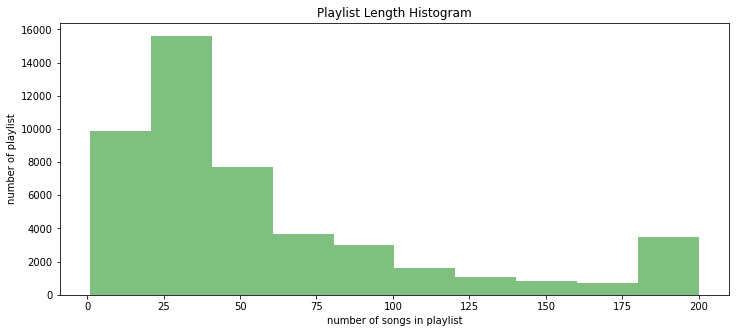

In [15]:
## 플레이리스트 내 음악 개수 

plt.figure(figsize = (12,5))

plt.hist(pli_len, bins = 10, alpha=0.5, color="green", label="songs")

plt.title('Playlist Length Histogram')
plt.xlabel('number of songs in playlist')
plt.ylabel('number of playlist')

In [16]:
#  음악 아이디 이름 매칭

inner_join = pd.merge(unique_song_df, 
                      song_meta_df, 
                      on ='id', 
                      how ='inner')

song_df=inner_join.sort_values(by=['count'],ascending=False)
song_df['artist_name'] = [l[0] for l in song_df['artist_name_basket']]

In [17]:
song_df

,id,count,song_name,artist_name_basket,artist_name
0,116573,905,안아줘,[정준일],정준일
1,366786,830,가끔 미치도록 네가 안고 싶어질 때가 있어,[가을방학],가을방학
2,133143,770,"그대와 나, 설레임 (Feat. 소울맨)",[어쿠스틱 콜라보],어쿠스틱 콜라보
3,654757,752,눈의 꽃,[박효신],박효신
4,205179,725,꿀맛,[정미애],정미애
...,...,...,...,...,...
308904,624135,1,Discreet,[Leng Hock],Leng Hock
308905,525075,1,"Mozart : Symphony No.41 In C Major K551, `Jupi...",[Nikolaus Harnoncourt],Nikolaus Harnoncourt
308906,525074,1,Not Today,[온음],온음
308907,525071,1,I Don&#39;t Feel So Well,[Vienna Teng],Vienna Teng


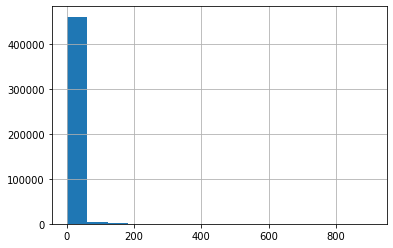

In [18]:
# 극단적으로 편포된 음악 분포
song_df['count'].hist(bins=15)

In [19]:
artist_count=(song_df.groupby('artist_name')['count'].
              agg(sum='sum').
              reset_index().
              sort_values(by='sum',ascending=False))

artist_count.head(10)

,artist_name,sum
52419,Various Artists,19708
65482,아이유,17027
62325,방탄소년단,10931
63783,성시경,9703
62214,박효신,8547
64682,스탠딩 에그,8150
63944,소녀시대 (GIRLS` GENERATION),7512
4641,BIGBANG,7383
66003,어반자카파,7351
10621,Crush,7277


### 중복 확인 및 제거

In [25]:
## 중복확인 및 제거

song_df['id'].duplicated().sum()

0

## 분석

In [26]:
song_df=song_df[song_df['count']>=10]
song_use = song_df['id'].tolist()

In [27]:
# interaction data

# 플레이리스트 내 음악이 20개 이상 있어야함
# 10회 이상 플레이리스트 에 들어간 음악이어야 함

long_2=long_df[long_df['songs'].isin(song_use)]

In [33]:
use_count=long_2.groupby('id').count()
use_count=use_count[use_count['songs']>=10]
use_count_idx = use_count.index.to_list()

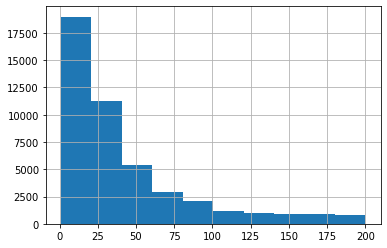

In [35]:
long_2.groupby('id').agg('count').songs.hist()

In [28]:
#cond=long_2.groupby('id').agg('count').songs >= 10 ## ????? 이거보다 나은 방법 찿기
#cond=cond.reset_index()
#use_long_df=long_2.iloc[cond.id]

In [34]:
use_long_df = use_long_df[use_long_df.id.isin(use_count_idx)]

In [36]:
use_long_df['include'] = 1
use_long_df.head()

,id,songs,like_cnt,include
46524,74220,452196,53211,1
46524,74220,204192,53211,1
46524,74220,481009,53211,1
46524,74220,247927,53211,1
85071,122388,432753,41844,1


In [32]:
# 분석용 패키지 import
import tensorflow as tf

from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dropout, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.layers import add
from tensorflow.keras.models import Model
#from model.BaseModel import BaseModel
from sklearn.model_selection import train_test_split

In [158]:
# input df 
# id컬럼을 인덱스로
#input_df=df.set_index('id')
#input=input_df.reset_index()

In [37]:
ex_long=use_long_df.reset_index()

In [60]:
ex_long_interaction=ex_long[['id','songs','include']]
ex_long_interaction=ex_long_interaction.astype(float)
ex_long_interaction['dummy_id'] =ex_long_interaction['id']
ex_long_interaction['index'] =ex_long_interaction['id']

In [52]:
fin_count = ex_long_interaction.groupby('id').count()

In [59]:
bin_df=fin_count.reset_index().reset_index()

,index,id,songs,include,dummy_id
0,0,107.0,38,38,38
1,1,164.0,1,1,1
2,2,217.0,17,17,17
3,3,228.0,52,52,52
4,4,307.0,26,26,26
...,...,...,...,...,...
2176,2176,153075.0,11,11,11
2177,2177,153187.0,8,8,8
2178,2178,153242.0,2,2,2
2179,2179,153280.0,14,14,14


In [64]:
join = pd.merge(ex_long_interaction,bin_df,on='id',how='left')
join

,id,songs_x,include_x,dummy_id_x,index_x,index_y,songs_y,include_y,dummy_id_y
0,74220.0,452196.0,1.0,74220.0,74220.0,1069,4,4,4
1,74220.0,204192.0,1.0,74220.0,74220.0,1069,4,4,4
2,74220.0,481009.0,1.0,74220.0,74220.0,1069,4,4,4
3,74220.0,247927.0,1.0,74220.0,74220.0,1069,4,4,4
4,122388.0,432753.0,1.0,122388.0,122388.0,1763,49,49,49
...,...,...,...,...,...,...,...,...,...
45094,42267.0,457943.0,1.0,42267.0,42267.0,606,5,5,5
45095,42267.0,12397.0,1.0,42267.0,42267.0,606,5,5,5
45096,42267.0,407533.0,1.0,42267.0,42267.0,606,5,5,5
45097,42267.0,346967.0,1.0,42267.0,42267.0,606,5,5,5


In [157]:
join[join['index_y']==0]

,id,songs_x,include_x,dummy_id_x,index_x,index_y,songs_y,include_y,dummy_id_y
10830,107.0,70662.0,1.0,107.0,107.0,0,38,38,38
10831,107.0,222763.0,1.0,107.0,107.0,0,38,38,38
10832,107.0,402779.0,1.0,107.0,107.0,0,38,38,38
10833,107.0,545007.0,1.0,107.0,107.0,0,38,38,38
10834,107.0,475635.0,1.0,107.0,107.0,0,38,38,38
10835,107.0,133184.0,1.0,107.0,107.0,0,38,38,38
10836,107.0,609666.0,1.0,107.0,107.0,0,38,38,38
10837,107.0,544099.0,1.0,107.0,107.0,0,38,38,38
10838,107.0,491982.0,1.0,107.0,107.0,0,38,38,38
10839,107.0,30291.0,1.0,107.0,107.0,0,38,38,38


In [86]:
real_fin = join[['index_y','songs_x','include_x']]


real_fin.columns = ['dummy_id','songs','include']
real_fin=real_fin.sort_values(by='dummy_id',ascending=True)

In [50]:
#ex_fin_df.sort_values(by='dummy_id')
#ex_fin_df = ex_fin_df[['dummy_id','songs','include']]

In [46]:
#x_fin_df['dummy_id']

0         136.0
1         136.0
2         136.0
3         136.0
4        2037.0
          ...  
45094     313.0
45095     313.0
45096     313.0
45097     313.0
45098     313.0
Name: dummy_id, Length: 45099, dtype: float64

### Train Test Split


In [73]:
#train, test = train_test_split(real_fin,test_size = 0.2, shuffle=False,random_state=42)


print(train.shape)
print(test.shape)


(36079, 3)
(9020, 3)


In [87]:
n = 80
train=real_fin.head(int(len(df)*(n/100)))

In [88]:
to_test=train.dummy_id.tolist()
test = real_fin[~real_fin['dummy_id'].isin(to_test)]
test

,dummy_id,songs,include
22799,1833,502709.0,1.0
22797,1833,535060.0,1.0
22798,1833,88403.0,1.0
22800,1833,523071.0,1.0
22805,1833,164521.0,1.0
...,...,...,...
25516,2180,591225.0,1.0
25515,2180,678905.0,1.0
25514,2180,140000.0,1.0
25517,2180,411370.0,1.0


In [89]:
train

,dummy_id,songs,include
10851,0,153271.0,1.0
10858,0,42792.0,1.0
10857,0,218626.0,1.0
10856,0,285934.0,1.0
10855,0,209088.0,1.0
...,...,...,...
42835,1832,243585.0,1.0
42834,1832,244799.0,1.0
42845,1832,465739.0,1.0
42844,1832,356604.0,1.0


In [90]:
train.groupby('dummy_id').agg('count')

,songs,include
dummy_id,,
0,38,38
1,1,1
2,17,17
3,52,52
4,26,26
...,...,...
1828,30,30
1829,10,10
1830,60,60


In [91]:
users_items_matrix_df = train.pivot(index   = 'dummy_id', 
                                    columns = 'songs', 
                                    values  = 'include').fillna(0)

In [92]:
users_items_matrix_df

songs,10.0,19.0,47.0,54.0,62.0,67.0,71.0,93.0,96.0,149.0,199.0,210.0,224.0,250.0,270.0,289.0,311.0,424.0,463.0,470.0,482.0,508.0,523.0,532.0,543.0,565.0,642.0,645.0,671.0,683.0,699.0,765.0,787.0,953.0,961.0,963.0,997.0,1016.0,1036.0,1156.0,...,706509.0,706518.0,706529.0,706667.0,706747.0,706758.0,706790.0,706842.0,706876.0,706892.0,706903.0,706952.0,707013.0,707089.0,707093.0,707340.0,707369.0,707394.0,707458.0,707499.0,707513.0,707529.0,707552.0,707564.0,707573.0,707580.0,707597.0,707621.0,707635.0,707659.0,707719.0,707724.0,707763.0,707771.0,707788.0,707827.0,707837.0,707849.0,707858.0,707913.0
dummy_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 인풋데이터 만들기

In [93]:
 # 인풋데이터 만들기
def data_preparation(user_item_matrix):
    '''
    Create a Input to Model
    '''
    users_ids  = list(user_item_matrix.index)
    x_user_ids = np.array(users_ids).reshape(len(users_ids), 1)
    
    X = [user_item_matrix.values, x_user_ids]
    y = user_item_matrix.values

    return X, y

In [94]:
X, y = data_preparation(users_items_matrix_df)

In [95]:
users_ids = list(users_items_matrix_df.index)
x_user_ids = np.array(users_ids).reshape(len(users_ids), 1)

In [309]:
type(X)

list

In [267]:
#users_items_matrix    = users_items_matrix_df.values
#users_ids             = list(users_items_matrix_df.index)

In [97]:
train

,dummy_id,songs,include
10851,0,153271.0,1.0
10858,0,42792.0,1.0
10857,0,218626.0,1.0
10856,0,285934.0,1.0
10855,0,209088.0,1.0
...,...,...,...
42835,1832,243585.0,1.0
42834,1832,244799.0,1.0
42845,1832,465739.0,1.0
42844,1832,356604.0,1.0


In [311]:
X

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[1.07000e+02],
        [2.17000e+02],
        [3.07000e+02],
        ...,
        [1.53010e+05],
        [1.53075e+05],
        [1.53333e+05]])]

In [103]:
# hyper

factors = 500 # 잠재요인의 수 
epochs  = 50
batch   = 64
activation = 'selu'
dropout = 0.8
lr      = 0.0001
reg     = 0.0001


In [179]:
  def build_model(X):
    
    # Params
    users_items_matrix, x_user_ids = X

    # Model
    x_item = Input((users_items_matrix.shape[1],), name='PlaylistScore')
    h_item = Dropout(dropout)(x_item)
    h_item = Dense(factors, 
                      kernel_regularizer=l2(reg), 
                      bias_regularizer=l2(reg), 
                      activation=activation)(h_item)

    # dtype should be int to connect to Embedding layer
    x_user = Input((1,), dtype='int32', name='PlaylistContent')
    h_user = Embedding(len(np.unique(x_user_ids))+1,factors, 
                        input_length=1, 
                        embeddings_regularizer=l2(reg))(x_user)
    h_user = Flatten()(h_user)

    h = add([h_item, h_user], name='LatentSpace')
    y = Dense(users_items_matrix.shape[1], activation='linear', name='UserScorePred')(h)

    return Model(inputs=[x_item, x_user], outputs=y)

In [180]:
melon_model =build_model(X)
melon_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PlaylistScore (InputLayer)      [(None, 20638)]      0                                            
__________________________________________________________________________________________________
PlaylistContent (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 20638)        0           PlaylistScore[0][0]              
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 500)       917000      PlaylistContent[0][0]            
____________________________________________________________________________________________

In [100]:
model = build_model(X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
UserScore (InputLayer)          [(None, 20638)]      0                                            
__________________________________________________________________________________________________
UserContent (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 20638)        0           UserScore[0][0]                  
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 200)       366800      UserContent[0][0]                
______________________________________________________________________________________________

In [105]:
def fit(X, y):
    # Build model
    model = build_model(X)

    model.compile(optimizer = Adam(learning_rate=lr), 
                    loss='mse')#'mean_absolute_error'

    # train
    hist = model.fit(x=X, y=y,
                      epochs=epochs,
                      batch_size=batch,
                      shuffle=True,
                      validation_split=0.1)

    # Melhor peso
    #self.model = model

    return model, hist


In [106]:
model, hist = fit(X, y)

Epoch 1/50
26/26 [==============================] - 8s 281ms/step - loss: 0.1590 - val_loss: 0.1388
Epoch 2/50
26/26 [==============================] - 7s 276ms/step - loss: 0.1228 - val_loss: 0.1058
Epoch 3/50
26/26 [==============================] - 7s 273ms/step - loss: 0.0934 - val_loss: 0.0805
Epoch 4/50
26/26 [==============================] - 7s 276ms/step - loss: 0.0713 - val_loss: 0.0618
Epoch 5/50
26/26 [==============================] - 7s 273ms/step - loss: 0.0551 - val_loss: 0.0482
Epoch 6/50
26/26 [==============================] - 7s 274ms/step - loss: 0.0431 - val_loss: 0.0381
Epoch 7/50
26/26 [==============================] - 7s 268ms/step - loss: 0.0343 - val_loss: 0.0305
Epoch 8/50
26/26 [==============================] - 7s 272ms/step - loss: 0.0277 - val_loss: 0.0248
Epoch 9/50
26/26 [==============================] - 7s 270ms/step - loss: 0.0226 - val_loss: 0.0204
Epoch 10/50
26/26 [==============================] - 7s 274ms/step - loss: 0.0187 - val_loss: 0.0169

In [176]:
def plot_hist(hist):
  # summarize history for loss
  fig, ax = plt.subplots()  # create figure & 1 axis

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  return fig   


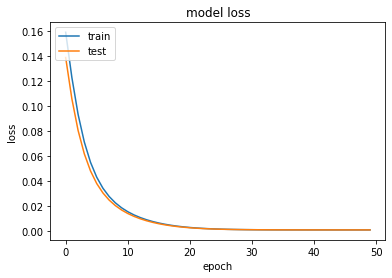

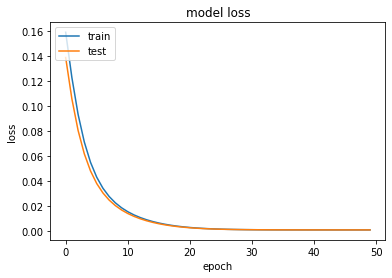

In [178]:
plot_hist(hist)

In [107]:
  def predict(X):

    # Predict
    pred = model.predict(X)

    # remove watched items from predictions
    pred = pred * (X[0] == 0) 

    return pred


In [108]:
pred = predict(X)

In [126]:
cf_preds_df = pd.DataFrame(pred, 
                              columns = users_items_matrix_df.columns, 
                              index=users_ids).transpose()

In [127]:
cf_preds_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832
songs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.0,0.001051,0.000416,0.000913,0.000429,0.000269,0.000179,0.001341,0.000415,0.000658,0.000830,0.000490,-0.000108,0.000725,0.000223,0.000458,0.000340,0.000431,0.000449,0.000700,0.001095,0.000391,0.000426,4.003184e-04,0.000218,0.000111,0.000440,0.001030,0.000344,0.001085,0.000454,0.000959,0.000433,0.000271,0.000409,0.000345,0.000329,0.000372,0.000383,0.000393,0.000258,...,0.000924,0.000460,0.000361,0.000409,0.000414,0.000380,0.000415,0.000425,0.000534,0.000654,0.000395,0.000642,0.000357,0.000527,4.986612e-04,0.000851,0.000716,0.000436,0.000321,0.000434,0.000380,0.000003,0.000459,0.000397,0.000471,0.000395,0.000427,0.000308,0.000394,0.000495,0.000712,0.000441,0.000450,0.000689,0.001109,0.000523,0.000459,0.001075,0.000171,0.000443
19.0,0.000812,0.000437,0.000642,0.000659,0.000467,0.000633,0.001066,0.000401,0.000233,0.000595,0.000765,-0.000313,0.000097,0.000518,0.000477,0.000194,0.000449,0.000462,0.000773,0.000348,0.000451,0.000421,5.018978e-04,0.000390,0.000109,0.000492,0.000834,0.000260,0.000357,0.000423,0.000682,0.000402,0.000667,0.000491,0.000448,0.000333,-0.000115,0.000538,0.000437,0.000611,...,0.000865,0.000433,0.000370,0.000428,0.000465,0.000545,0.000582,0.000382,0.000528,0.000440,0.000429,0.000683,0.000392,0.000285,4.514962e-04,0.001039,0.000629,0.000450,0.000359,0.000472,0.000363,0.000307,0.000391,0.000495,0.000488,0.000393,0.000382,0.000479,0.000415,0.000493,0.000107,0.000427,0.000448,0.000514,0.000611,0.000502,0.000433,0.000206,0.000569,0.000418
47.0,0.000834,0.000542,0.000195,0.000390,0.000591,0.000373,0.000612,0.000465,0.000356,0.000900,0.000586,0.000651,0.000996,0.000635,0.000493,0.000280,0.000512,0.000528,0.000771,0.000465,0.000496,0.000532,6.615991e-04,0.000581,0.000781,0.000563,0.000142,0.000753,0.000410,0.000623,0.000173,0.000549,0.000612,0.000555,0.000410,0.000516,0.000458,0.000460,0.000488,0.000864,...,0.000498,0.000586,0.000617,0.000575,0.000536,0.000606,0.000428,0.000564,0.000491,0.000502,0.000500,0.000828,0.000571,0.000594,5.057184e-04,0.000741,0.000789,0.000595,0.000394,0.000594,0.000666,0.000666,0.000315,0.000543,0.000478,0.000568,0.000455,0.000405,0.000561,0.000642,0.000513,0.000532,0.000397,0.000714,0.000444,0.000513,0.000569,0.000261,0.000216,0.000495
54.0,0.001348,0.000688,0.000775,0.000128,0.000407,0.000685,0.000657,0.000663,0.000461,0.001062,0.000516,0.001528,0.000610,0.000839,0.000717,0.000636,0.000688,0.000675,0.000697,0.000364,0.000725,0.000790,5.132901e-04,0.000791,0.000524,0.000706,0.001140,0.000805,0.000170,0.000645,0.000635,0.000569,0.000809,0.000731,0.000720,0.000876,0.000587,0.000610,0.000651,0.000196,...,0.000776,0.000596,0.000775,0.000695,0.000708,0.000638,0.000631,0.000838,0.000695,0.000803,0.000716,0.000800,0.000694,0.000647,6.947441e-04,0.000703,0.000667,0.000805,0.000779,0.000611,0.000684,0.000517,0.000661,0.000698,0.000634,0.000856,0.000581,0.000648,0.000717,0.000780,0.000621,0.000698,0.000692,0.000593,0.000405,0.000510,0.000648,0.000271,0.000596,0.000710
62.0,0.001422,0.001684,0.001684,0.002085,0.001812,0.001597,0.002246,0.001647,0.001611,0.001524,0.001589,0.002223,0.001950,0.001663,0.001806,0.001805,0.001676,0.001567,0.001498,0.001938,0.001640,0.001652,1.435333e-03,0.001760,0.001596,0.001659,0.001524,0.001252,0.001871,0.001607,0.001847,0.001737,0.001683,0.001675,0.001745,0.001532,0.001146,0.001706,0.001705,0.001675,...,0.001739,0.001600,0.001585,0.001631,0.001651,0.001809,0.001575,0.001751,0.001635,0.001644,0.001675,0.001446,0.001747,0.001734,1.707445e-03,0.001868,0.001622,0.001644,0.001637,0.001606,0.001713,0.001874,0.001624,0.001673,0.001681,0.001725,0.001622,0.001709,0.001660,0.001718,

In [147]:
class CFRecommender:
  '''

  '''
  
  MODEL_NAME = 'Collaborative Filtering'
  
  def __init__(self, cf_predictions_df, items_df=None):
      self.cf_predictions_df = cf_predictions_df
      self.items_df = items_df
      
  def get_model_name(self):
      return self.MODEL_NAME
      
  def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
      # Get and sort the user's predictions
      sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                  .reset_index().rename(columns={user_id: 'score'})

      # Recommend the highest predicted rating movies that the user hasn't seen yet.
      recommendations_df = sorted_user_predictions[~sorted_user_predictions['songs'].isin(items_to_ignore)] \
                             .sort_values('score', ascending = False) \
                             .head(topn)

      if verbose:
        if self.items_df is None:
            raise Exception('"items_df" is required in verbose mode')

        recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                      left_on = 'songs', 
                                                      right_on = 'songs')


      return recommendations_df    

In [149]:
# converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(pred, 
                              columns = users_items_matrix_df.columns, 
                              index=users_ids).transpose()

In [148]:
song_meta_df['songs']=song_meta_df['id']
song_meta_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,song_name,artist_name_basket,songs
0,0,Feelings,[Various Artists],0
1,1,"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1
2,2,Solsbury Hill (Remastered 2002),[Peter Gabriel],2
3,3,Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3
4,4,그남자 그여자,[Jude Law],4
...,...,...,...,...
707984,707984,Coffin For Head Of State,[Fela Kuti],707984
707985,707985,Change Of Heart,[Cyndi Lauper],707985
707986,707986,스치듯 안녕,[윤종신],707986
707987,707987,숲의 빛,[Nature Piano],707987


In [150]:
cf_recommender_model = CFRecommender(cf_preds_df, song_meta_df)

In [151]:
rec_list = cf_recommender_model.recommend_items(user_id = 0, 
                                                  items_to_ignore=[], 
                                                  topn=10, 
                                                  verbose=True)

In [182]:
rec_list[['score','song_name','artist_name_basket']]

,score,song_name,artist_name_basket
0,0.011629,Someone Like You,[Adele]
1,0.009088,가끔 미치도록 네가 안고 싶어질 때가 있어,[가을방학]
2,0.009083,체념,[빅마마]
3,0.008958,Falling Slowly,[Glen Hansard & Marketa Irglova]
4,0.008722,기다리다,[윤하 (YOUNHA)]
5,0.008612,사랑인걸,[모세]
6,0.008549,Madeleine Love,[CHEEZE (치즈)]
7,0.008533,Lost Stars,[Adam Levine]
8,0.008530,Uptown Funk (Feat. Bruno Mars),[Mark Ronson]
9,0.008482,기억의 습작,[전람회]


In [154]:
rec_list_2 = cf_recommender_model.recommend_items(user_id = 1, 
                                                  items_to_ignore=[], 
                                                  topn=10, 
                                                  verbose=True)

In [156]:
rec_list_2

,songs,score,id,song_name,artist_name_basket
0,140867.0,0.011161,140867,Someone Like You,[Adele]
1,207558.0,0.009746,207558,Falling Slowly,[Glen Hansard & Marketa Irglova]
2,366786.0,0.009059,366786,가끔 미치도록 네가 안고 싶어질 때가 있어,[가을방학]
3,459256.0,0.008587,459256,Uptown Funk (Feat. Bruno Mars),[Mark Ronson]
4,11657.0,0.008353,11657,Lost Stars,[Adam Levine]
5,300087.0,0.008167,300087,Madeleine Love,[CHEEZE (치즈)]
6,1236.0,0.008164,1236,체념,[빅마마]
7,133143.0,0.007852,133143,"그대와 나, 설레임 (Feat. 소울맨)",[어쿠스틱 콜라보]
8,118827.0,0.007776,118827,저녁 하늘,[에일리]
9,705515.0,0.007776,705515,Don`t Know Why,[Norah Jones]


## Metric의 한계

## References





In [173]:
model.save("/content/drive/MyDrive/Colab Notebooks/recosys_project/my_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/recosys_project/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/recosys_project/my_model/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
